<a href="https://colab.research.google.com/github/dshinde/DSTestGitHub/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup and Load Data

## 1.1 Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

^C


In [ ]:
!pip list

Package                          Version               Editable project location
-------------------------------- --------------------- -------------------------
absl-py                          1.4.0
accelerate                       0.34.2
aiofiles                         22.1.0
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
aiosqlite                        0.20.0
alabaster                        0.7.16
albucore                         0.0.16
albumentations                   1.4.15
alembic                          1.14.0
altair                           5.5.0
annotated-types                  0.7.0
annoy                            1.17.3
ansicolors                       1.1.8
antlr4-python3-runtime           4.9.3
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
args                             0.1.0
array_record                     0.5.1
arrow   

In [4]:
import tensorflow as tf
import os

In [ ]:
#Not Required in Kaggle/Collab
#gpus = tf.config.experimental.list_physical_devices('CPU')
#gpus
#for gpu in gpus:
#    tf.config.experimental.set_memoty_growth(gpu, True)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## 1.2 Remove dodgy images

In [13]:
# Run this code only if you want to empty "Sad" and "happy" folder
import os
import glob

def delete_all_files(folder_path):
    # Get a list of all files in the folder
    files = glob.glob(os.path.join(folder_path, '*'))

    for file in files:
        try:
            if os.path.isfile(file):
                os.remove(file)
                print(f"Deleted file: {file}")
            else:
                print(f"Skipped non-file: {file}")
        except Exception as e:
            print(f"Error deleting file {file}: {e}")

# Example usage
folder_path = './data/sad'
delete_all_files(folder_path)

Deleted file: ./data/sad/man_sitting.jpg
Deleted file: ./data/sad/dering-frustrated-man-expressing-no-idea-white-people-man-character-60484638.jpg
Deleted file: ./data/sad/image45.jpeg
Deleted file: ./data/sad/image70.png
Deleted file: ./data/sad/52386436541_892bc89bd6_h.jpg
Deleted file: ./data/sad/shutterstock_141411661-min.jpg
Deleted file: ./data/sad/image75.png
Deleted file: ./data/sad/199816057.jpg
Deleted file: ./data/sad/image41.jpeg
Deleted file: ./data/sad/image14.jpeg
Deleted file: ./data/sad/a-sad-mature-man-alone-in-darkness-sitting-and-thinking-HPIF02784.jpg
Deleted file: ./data/sad/image49.jpeg
Deleted file: ./data/sad/jack-lucas-smith-Zxq0dvmRyIo-unsplash-1024x701.jpg
Deleted file: ./data/sad/image74.png
Deleted file: ./data/sad/image66.png
Deleted file: ./data/sad/960x0.jpg
Deleted file: ./data/sad/image52.jpeg
Deleted file: ./data/sad/vector10.svg
Deleted file: ./data/sad/sad.jpg
Deleted file: ./data/sad/stock-photo-portrait-of-a-sad-man-126009806.jpg
Deleted file: ./

In [26]:
#Opensource library for computer vision
import cv2
# Checks file extension if it is valid image
import imghdr
from matplotlib import pyplot as plt

In [15]:
data_dir='data'
os.listdir(os.path.join(data_dir,'happy'))
image_exts = ['jpeg','jpg','bmp','png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [19]:
#Code to loop through folders and images
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)

business-people-succesful-celebrating-group-successful-39416686-800x500.jpg
image45.jpeg
healthy-habits.jpg
image41.jpeg
35438_hd.jpg
_happy_jumping_on_beach-40815.jpg
Super-Happy-People-yay.jpg
25115.jpg
360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg
960x0.jpg
670dc58a1a956551043bb21f_traitshappypeople.jpeg
image42.jpeg
friends-happy-190821-1490x838.jpg
-in-svg-png-gif-file-formats--group-crowd-smiling-pack-illustrations-6983306.png
A_Sep20_14_1189155141.jpg
image37.jpeg
Screen-Shot-2019-09-10-at-2.39.32-PM-1024x621.png
Happy.jpg
image29.jpeg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
7-principles-of-successful-and-happy-people.png
file-20230208-27-3jttof.jpg
happy-people-9660980.jpg
image33.jpeg
rating-victory-isolated-white-background-concept-friendship-healthy-91211177.jpg
happy-people-celebrating-flat-vector-illustration_941097-38994.jpg
4239f3d51d092f69d529f372a37b4601.jpg
happy-people3.png
71hBPTAhIXL._AC_UF10001000_QL80_.jpg
group-young-happy-people-w

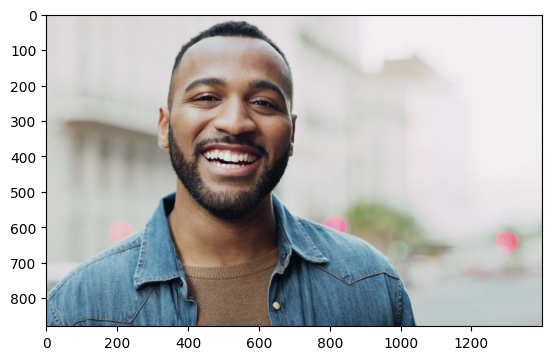

In [29]:
 #code on how to read image. It is numpy array
 img = cv2.imread(os.path.join('data', 'happy', '05-12-21-happy-people.jpg'))
img.shape
plt.imshow(img)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data/happy/220px-Shiny_Happy_People_Duggar_Family_Secrets_poster.jpg
Image not in ext list data/happy/smiling-woman_W6GFOSFAXA.jpg
Image not in ext list data/happy/getty_478389113_970647970450091_99776.jpg
Image not in ext list data/happy/Happy20People.jpg
Image not in ext list data/happy/smiling-young-african-american-woman-260nw-2290057229.jpg
Image not in ext list data/happy/getty_152414899_97046097045006_68075.jpg
Image not in ext list data/sad/52386436541_892bc89bd6_h.jpg
Image not in ext list data/sad/aHR0cHM6Ly9iLnN0YWJsZWNvZy5jb20vMWE5MGYyODMtYWI4ZC00ZTliLWE4MzYtNGZlYjQ3NDZhZWU3LmpwZWc.webp
Image not in ext list data/sad/YZc3LzlASxePQJ_H-iexKQ.webp
Image not in ext list data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list data/sad/sad-man-260nw-82004164.jpg
Image not in ext list data/sad/depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in ext list data/sad/sad-person-pictures-1920-x-1080-50n6grpzx04t1xn7.jpg
Image not i

## 1.3 Load Data

In [100]:
import numpy as np

In [33]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 179 files belonging to 2 classes.


In [34]:
data_iterator = data.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7fee088c68f0>)

In [42]:
# Get another batch
batch = data_iterator.next()

In [39]:
# Images represented as numpy arrayas
batch[0].shape

(32, 256, 256, 3)

In [40]:
# Class 1 = SAD
# Class 2 = HAPPY
batch[1]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

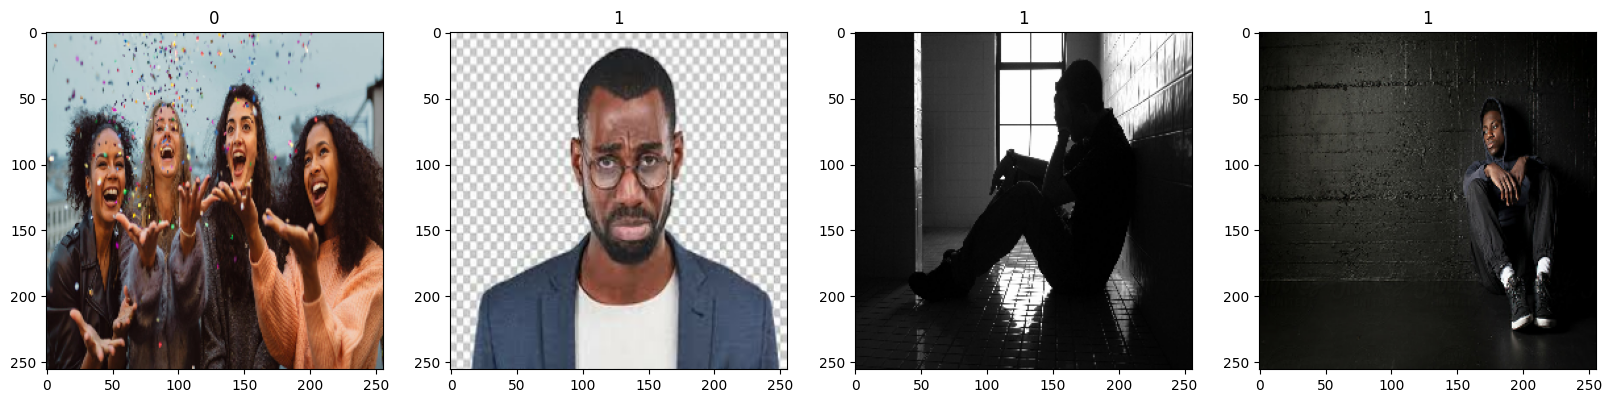

In [43]:

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2.Preporcess Data

## 2.1 Scale Data

In [46]:
batch[0].shape

(32, 256, 256, 3)

In [45]:
data =  data.map(lambda x, y: (x/255, y))

In [50]:
scaled_iterator = data.as_numpy_iterator()

In [51]:
batch = scaled_iterator.next()

In [52]:
batch[0].max()

1.0

## 2.2 Split Data

In [53]:
len(data)

6

In [59]:
train_size = int(len(data)*.7)
val_size = int (len(data)*.2)
test_size = int (len(data)*.2)

In [63]:
train_size + val_size + test_size

6

In [67]:
test_size

1

In [69]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test  = data.skip(train_size + val_size).take(val_size)

In [71]:
len(train)

4

# 3.Deep Model

## 3.1 Build Deep Learning Model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [81]:
model = Sequential()

In [82]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [85]:
logdir = 'logs'

In [86]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [87]:

hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4781 - loss: 0.9336 - val_accuracy: 0.3438 - val_loss: 0.7840
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5000 - loss: 0.7088 - val_accuracy: 0.5312 - val_loss: 0.6247
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6458 - loss: 0.5401 - val_accuracy: 0.8750 - val_loss: 0.4508
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.7979 - loss: 0.4638 - val_accuracy: 0.7500 - val_loss: 0.5212
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8052 - loss: 0.4435 - val_accuracy: 0.9688 - val_loss: 0.3113
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8594 - loss: 0.3354 - val_accuracy: 0.8125 - val_loss: 0.4113
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8948 - loss: 0.2666 - val_accuracy: 0.7812 - val_loss: 0.4036
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9083 - loss: 0.2179 - val_accuracy: 0.8750 - val_loss: 0.2712
Epoch 9/

## 3.3 Plot Performance

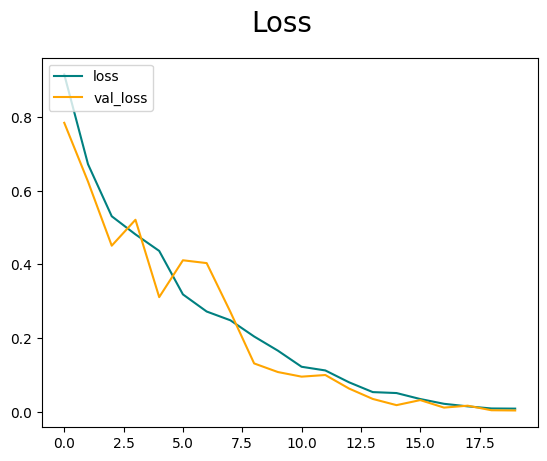

In [88]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

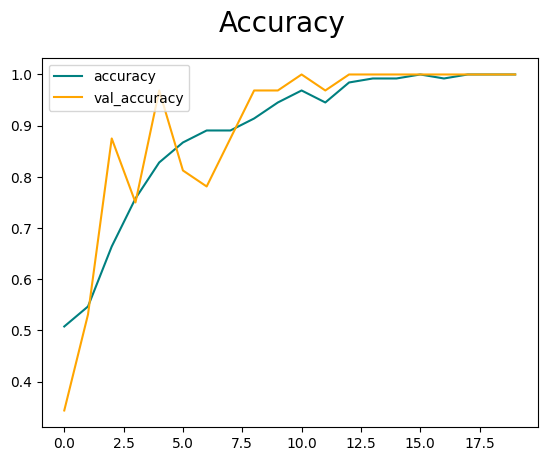

In [89]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate

In [90]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [91]:

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [92]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


In [94]:

print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 4.2 Test

In [95]:

import cv2

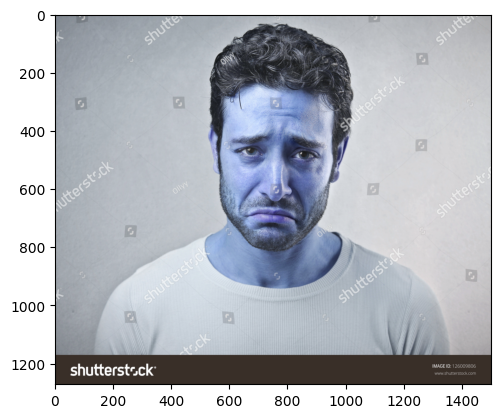

In [108]:
img = cv2.imread('sadperson.jpeg')
plt.imshow(img)
plt.show()

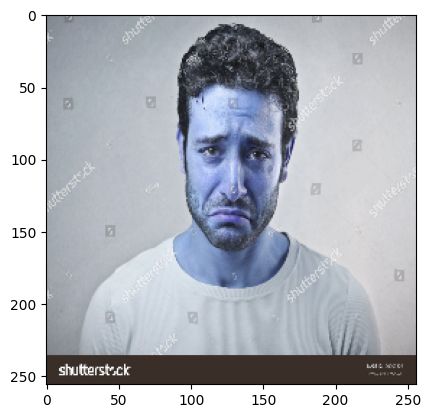

In [109]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [110]:
resize.shape

TensorShape([256, 256, 3])

In [103]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [111]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [112]:
yhat

array([[0.99988735]], dtype=float32)

In [113]:

if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 5. Save the model

```
# This is formatted as code
```



In [114]:

from tensorflow.keras.models import load_model

In [116]:
model.save('happysadclassifier.keras')

In [117]:

new_model = load_model('happysadclassifier.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [120]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [121]:

if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
